In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

import tools

In [13]:
def make_gauss_data(h):
    x = np.zeros((h,10))
    for i in range(10):
        x[:,i] = np.random.normal(i%2,1, h)
    y = np.array([ 1 if np.sum(np.multiply(x[i,:], x[i,:])) > 9.34 else -1 for i in range(h)])
    return x, y

## Adaboost from sklearn

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [5]:
xtrain, ytrain = make_gauss_data(5000)
xtest, ytest = make_gauss_data(2500)

SAMMER = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators = 500)
SAMME = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators = 500, algorithm="SAMME")

SAMMER.fit(xtrain,ytrain)
SAMME.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=None)

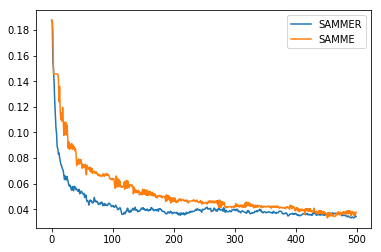

In [6]:
SAMMERerr = []
SAMMEerr = []
for SR, S in zip(SAMMER.staged_predict(xtest), SAMME.staged_predict(xtest)):
    SAMMERerr.append(1 - accuracy_score(SR, ytest))
    SAMMEerr.append(1 - accuracy_score(S, ytest))
plt.plot(range(500), SAMMERerr, label = 'SAMMER')
plt.plot(range(500), SAMMEerr, label = 'SAMME')
plt.legend()

In [7]:
depth = [1,2,3,4,5]
Errtest = np.zeros((5, 500))
Errtrain = np.zeros((5, 500))
xtrain, ytrain = make_gauss_data(5000)
xtest, ytest = make_gauss_data(2500)
for d in depth:
    adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth= d), n_estimators=500)
    adab.fit(xtrain, ytrain)
    c = 0
    for s, t in zip(adab.staged_predict(xtest), adab.staged_predict(xtrain)):
        Errtest[d-1,c] = 1 - accuracy_score(s, ytest)
        Errtrain[d-1,c] = 1 - accuracy_score(t, ytrain)
        c+=1


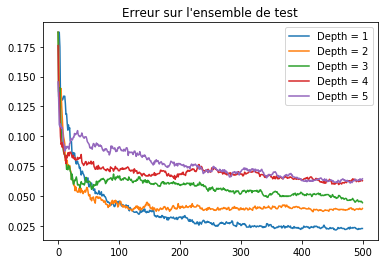

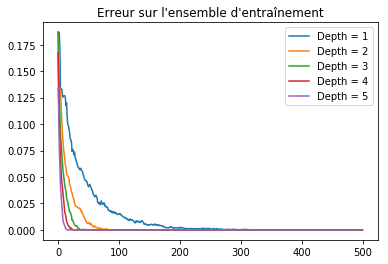

In [8]:
plt.figure()
for d in depth:
    plt.plot(range(500), Errtest[d-1,:], label = "Depth = {}".format(d))
plt.legend()
plt.title("Erreur sur l'ensemble de test")
plt.figure()
for d in depth:
    plt.plot(range(500), Errtrain[d-1,:], label = "Depth = {}".format(d))
plt.legend()
plt.title("Erreur sur l'ensemble d'entraînement")

On voit clairement qu'avec une profondeur trop grande, l'arbre sur-apprends

In [14]:
N = [10, 50, 100, 200, 300, 400, 500, 700, 1000]

train = []
test = []
for n in N:
    Anestim = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = n)
    Anestim.fit(xtrain,ytrain)
    train.append(Anestim.score(xtrain,ytrain))
    test.append(Anestim.score(xtest,ytest))
train = np.array(train)
test = np.array(test)

In [23]:
train2 = []
test2 = []
for n in N:
    Anestim = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), n_estimators = n)
    Anestim.fit(xtrain,ytrain)
    train2.append(Anestim.score(xtrain,ytrain))
    test2.append(Anestim.score(xtest,ytest))
train2 = np.array(train2)
test2 = np.array(test2)

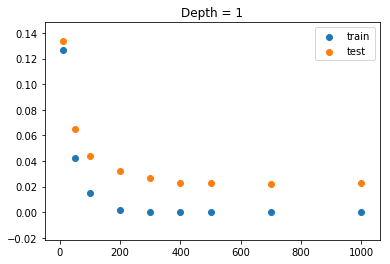

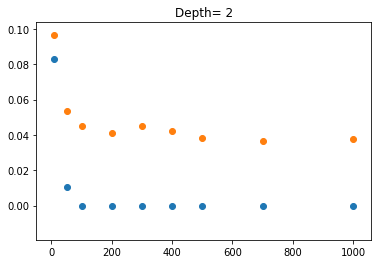

In [25]:
plt.figure()
plt.scatter(N, 1 - train, label = "train")
plt.scatter(N, 1 - test, label = "test")
plt.legend()
plt.title("Depth = 1")

plt.figure()
plt.scatter(N, 1 - train2, label = "train")
plt.scatter(N, 1- test2, label = "test")
plt.title("Depth= 2")

In [3]:
from sklearn.model_selection import cross_val_score
adacross = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators = 300)

In [14]:
xtrain, ytrain = make_gauss_data(5000)
xtest, ytest = make_gauss_data(2500)
scores = cross_val_score(adacross, xtrain,ytrain, cv = 5)

In [20]:
print( "Accuracy {} ± {}".format(scores.mean(), 2*scores.std()))

Accuracy 0.9670037726037727 ± 0.01927788917241493


## Test on MNIST Data

In [4]:
def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    """ l : liste des chiffres a extraire"""
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    idx = np.random.permutation(range(len(tmpy)))
    return tmpx[idx,:],tmpy[idx]

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

In [5]:
xuspstrain,yuspstrain = load_usps("../USPS/USPS_train.txt")
xuspstest,yuspstest = load_usps("../USPS/USPS_test.txt")

In [170]:
xtrain, ytrain = get_usps([1,6], xuspstrain, yuspstrain)
xtest, ytest = get_usps([1,6], xuspstest, yuspstest)

i = 1
j = 6
ytrain[ytrain == i] = 1
ytest[ytest == i] = 1
ytrain[ytrain == j] = -1
ytest[ytest == j] = -1

In [9]:
adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 4), n_estimators = 1000)
adab.fit(xuspstrain,yuspstrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=None)

In [7]:
adab.score(xuspstrain,yuspstrain)

0.94020024687971471

In [8]:
adab.score(xuspstest, yuspstest)

0.85401096163428003

In [11]:
adab.estimator_weights_

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1